In [1]:
import matplotlib.pyplot as plt
from math import *
import numpy as np

In [26]:
interval = 0.001

In [27]:
# 3x3 memristor crossbar
# 전압으로 MEMRISTOR 저
class Memristor:
    def __init__(self, name):
        self.name = name
        self.x = 0.1
        self.xp = 0.1
        self.xn = 0.2
        self.vp = 1.5
        self.vn = 0.7
        self.alphap = 6
        self.alphan = 4
        self.a1 = 4e-4
        self.a2 = 3e-4
        self.ap = 0.032
        self.an = 0.001
        self.b = 1.0
        
        self.gf = 0.0
        
        self.interval = 0.001
    
    def change_x(self, V):
        if V >= 0:
            if self.x >= self.xp:
                self.f = exp(-self.alphap*(self.x - self.xp)) * (((self.xp - self.x)/(1 - self.xp)) + 1)
            else:
                self.f = 1.0
        elif V < 0:
            if self.x <= (1 - self.xn):
                self.f = exp(self.alphan*(self.x + self.xn - 1.0)) * (self.x/(1-self.xn))
            else:
                self.f = 1.0
            
        if V > self.vp:
            self.g = self.ap * (exp(V)-exp(self.vp))
        elif V < -self.vn:
            self.g = -self.an * (exp(-V)-exp(self.vn))
        else:
            self.g = 0
            
        self.gf = self.f * self.g
        self.x += self.gf * self.interval
    
    def activate(self, V):
        self.change_x(V)
        
        if V >= 0:
            curr = self.a1 * self.x * sinh(self.b * V)
        else:
            curr = self.a2 * self.x * sinh(self.b * V)
        
        self.resistance = V / curr
        
        return curr

In [30]:
w = (x-t)/2
print(w)

[[ 0. -1.  0.]
 [ 0.  0.  0.]
 [ 1. -1.  1.]]


   # 제대로

In [64]:
w = np.array([[0.5,0.2,0.5],
             [0.5,0.2,0.5],
             [1.0,0.2,1.0],
             [0.5,0.5,1.0],
             [0.2,0.2,0.2],
             [1.0,1.0,0.2]])

In [65]:
w = w.reshape(9,2)

In [66]:
print(w)

[[0.5 0.2]
 [0.5 0.5]
 [0.2 0.5]
 [1.  0.2]
 [1.  0.5]
 [0.5 1. ]
 [0.2 0.2]
 [0.2 1. ]
 [1.  0.2]]


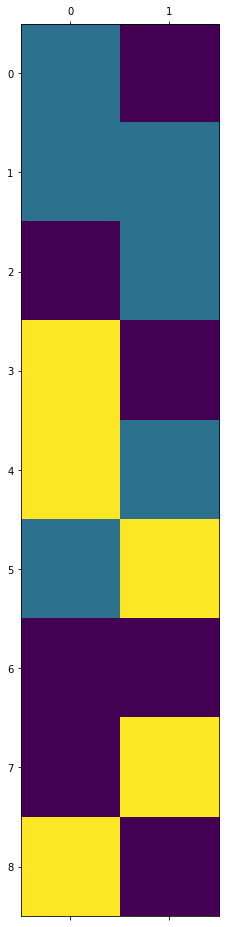

In [67]:
plt.matshow(w)

In [68]:
len(w)

9

In [69]:
V = 1.7
def mapping(w):
    output = []
    
    for i in range(len(w)):
        for j in range(len(w[0])):
            exec('mem_%d%d = Memristor("mem_%d%d")'%(i,j,i,j))
            
    for i, row in enumerate(w):
        out_row = []
        for j, t  in enumerate(row):
            for time in np.arange(0,t,0.001):
                exec('mem_%d%d.activate(V)'%(i,j))
            
            exec('out_row.append(mem_%d%d.x)'%(i,j))
        output.append(out_row)
    
    return np.array(output)

In [70]:
a = mapping(w)

[[0.115043   0.10621186]
 [0.115043   0.115043  ]
 [0.10621186 0.115043  ]
 [0.12862764 0.10621186]
 [0.12862764 0.115043  ]
 [0.115043   0.12862764]
 [0.10621186 0.10621186]
 [0.10621186 0.12862764]
 [0.12862764 0.10621186]]


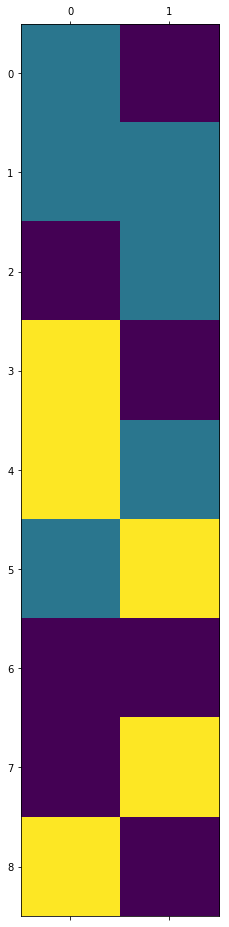

In [71]:
print(a)
plt.matshow(a)

In [73]:
X = np.array([[1,0,1],[0,1,0],[1,0,1]])
T = np.array([[1,1,1],[0,1,0],[0,1,0]])

In [74]:
print(X, '\n')
print(T)

[[1 0 1]
 [0 1 0]
 [1 0 1]] 

[[1 1 1]
 [0 1 0]
 [0 1 0]]


In [75]:
X = X.reshape(1,9)
T = T.reshape(1,9)

In [76]:
output1 = np.dot(X,w)
output2 = np.dot(T,w)

print(output1, output2)

[[2.9 1.6]] [[2.4 2.7]]
